<a href="https://colab.research.google.com/github/dmswl0707/Sodescar/blob/eunji/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/socar_usage-2.csv',  encoding='cp949')
data.head()

,reservation_id,region,reservation_return_at,reservation_start_at,member_age,member_gender,car_name,zone_name,zone_address,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3
0,19600422,서울특별시 강서구,2019-01-01 17:33:42,2018-12-31 17:30:00,48,male,아반떼AD,SK주차장,서울 강서구 방화동 500-8,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY
1,19670477,경기도 수원시 팔달구,2019-01-01 16:00:11,2018-12-31 18:20:00,30,male,그랜저IG (LPG),스타주차장,경기 수원시 팔달구 매산로1가 19-1,37.268503,127.002136,LIVING_ETC,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT
2,19670646,경기도 김포시,2019-01-02 17:30:00,2019-01-02 14:50:00,34,male,카니발 11인승,월드애비뉴,경기 김포시 구래동 6880-7,37.645571,126.627879,LIVING_APT,COMMERCIAL_HOTSPOT,ETC
3,19692831,경기도 남양주시,2019-01-01 20:53:09,2018-12-31 11:00:00,23,male,아반떼AD,제뉴빌딩주차장,경기 남양주시 호평동 642-2,37.654861,127.244576,LIVING_APT,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT
4,19728911,서울특별시 강서구,2019-01-04 14:06:03,2019-01-03 08:00:00,35,male,투싼(경유),용정주차장,서울 강서구 방화동 608-9,37.565186,126.816185,LIVING_ETC,TRANSFER_SUBWAY,ETC


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837732 entries, 0 to 837731
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   reservation_id         837732 non-null  int64  
 1   region                 837732 non-null  object 
 2   reservation_return_at  837732 non-null  object 
 3   reservation_start_at   837732 non-null  object 
 4   member_age             837732 non-null  int64  
 5   member_gender          716922 non-null  object 
 6   car_name               837732 non-null  object 
 7   zone_name              835922 non-null  object 
 8   zone_address           837732 non-null  object 
 9   zone_lat               837732 non-null  float64
 10  zone_lng               837732 non-null  float64
 11  zone_type1             805109 non-null  object 
 12  zone_type2             746905 non-null  object 
 13  zone_type3             695098 non-null  object 
dtypes: float64(2), int64(2), object(10)


In [ ]:
# 결측치 interpoalte 처리
data = data.interpolate(method='linear', limit_direction='forward')

In [ ]:
## 어떤 컬럼을 이용하는 게 좋을까요?
data = data.drop(['reservation_id', 'zone_address'],1)
data.head()

,region,reservation_return_at,reservation_start_at,member_age,member_gender,car_name,zone_name,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3
0,서울특별시 강서구,2019-01-01 17:33:42,2018-12-31 17:30:00,48,male,아반떼AD,SK주차장,37.573011,126.804605,LIVING_APT,TRANSFER_STATION,TRANSFER_SUBWAY
1,경기도 수원시 팔달구,2019-01-01 16:00:11,2018-12-31 18:20:00,30,male,그랜저IG (LPG),스타주차장,37.268503,127.002136,LIVING_ETC,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT
2,경기도 김포시,2019-01-02 17:30:00,2019-01-02 14:50:00,34,male,카니발 11인승,월드애비뉴,37.645571,126.627879,LIVING_APT,COMMERCIAL_HOTSPOT,ETC
3,경기도 남양주시,2019-01-01 20:53:09,2018-12-31 11:00:00,23,male,아반떼AD,제뉴빌딩주차장,37.654861,127.244576,LIVING_APT,TRANSFER_SUBWAY,COMMERCIAL_HOTSPOT
4,서울특별시 강서구,2019-01-04 14:06:03,2019-01-03 08:00:00,35,male,투싼(경유),용정주차장,37.565186,126.816185,LIVING_ETC,TRANSFER_SUBWAY,ETC


In [ ]:
data['reservation_start_at'] = pd.to_datetime(data['reservation_start_at'])
data['reservation_return_at'] = pd.to_datetime(data['reservation_return_at'])

In [ ]:
data['이용시간']=((data['reservation_start_at'] - data['reservation_return_at']))
data = data.sample(frac=1, random_state=0).reset_index(drop=True)
data.head()

,region,reservation_return_at,reservation_start_at,member_age,member_gender,car_name,zone_name,zone_lat,zone_lng,zone_type1,zone_type2,zone_type3,이용시간
0,경기도 의정부시,2019-12-29 19:37:38,2019-12-28 10:00:00,28,male,올뉴모닝,가능역 A 코레일 주차장,37.749414,127.044006,LIVING_VILLA,LIVING_ETC,TRANSFER_SUBWAY,-2 days +14:22:22
1,경기도 의정부시,2019-01-27 20:40:55,2019-01-27 18:10:00,21,male,아반떼AD,송산역 2번출구,37.737648,127.089508,LIVING_APT,TRANSFER_SUBWAY,NaN,-1 days +21:29:05
2,경기도 남양주시,2019-06-13 22:20:39,2019-06-13 13:30:00,25,female,아반떼AD,장수등갈비주차장,37.647758,127.305695,LIVING_APT,LIVING_VILLA,TRANSFER_BUS,-1 days +15:09:21
3,경기도 성남시 중원구,2019-09-16 20:39:27,2019-09-16 15:20:00,24,male,클리오,수진역환승주차장,37.437378,127.142014,LIVING_ETC,COMMERCIAL_HOTSPOT,ETC,-1 days +18:40:33
4,경기도 성남시 분당구,2019-03-11 13:29:46,2019-03-11 07:40:00,30,male,티볼리(경유),미금파크주차빌딩,37.351017,127.111397,TRANSFER_SUBWAY,COMMERCIAL_OFFICE,COMMERCIAL_HOTSPOT,-1 days +18:10:14


In [ ]:
# 임의의 컬럼 분석(나이 분포)
data['member_age'].describe()

count    837732.000000
mean         30.699743
std           8.345587
min          21.000000
25%          25.000000
50%          28.000000
75%          35.000000
max          85.000000
Name: member_age, dtype: float64

(array([3.83545e+05, 2.21398e+05, 1.19682e+05, 5.58150e+04, 3.86330e+04,
        1.50150e+04, 2.78800e+03, 7.87000e+02, 6.30000e+01, 6.00000e+00]),
 array([21. , 27.4, 33.8, 40.2, 46.6, 53. , 59.4, 65.8, 72.2, 78.6, 85. ]),
 <a list of 10 Patch objects>)

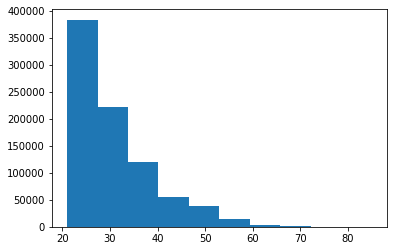

In [ ]:
plt.hist(data['member_age'], bins=10)

In [ ]:
data.shape

(837732, 13)

In [ ]:
# train 부분은 80%, test 부분은 20%
train = data[:670000]
test = data[67000:]

In [ ]:
x_train = np.asarray()
y_train = np.asarray()
x_test = np.asarray()
y_test = np.asarray()